# Conception d'un moulin à eau
## Correction

<img src="banc-essai-brushless.png" width="70%" style="float:center">
<img src="brushless-donnees-constructeur.png" width="80%" style="float:center">
<img src="donnee_modules_materiaux.png" width="90%" style="float:center">

### 1.1 Verification du train d'engrenage OneDrive :


**Question 1):**

Rapport de reduction et couple maximal sur (1):

$$i=\dfrac{\omega_2}{\omega_1}=\dfrac{N_2}{N_1}=\dfrac{Z_1}{Z_2}=\dfrac{r_1}{r_2}$$

$$\eta=\frac{P_2}{P_1}=\frac{C_2\omega_2}{C_1\omega_1}=\frac{C_2}{C_1}i\Rightarrow C1=\frac{1}{\eta}C_2i$$

Avec $T_1,T_2$ l'effort tangentiel au rayon primitif pour $r_1$ et $r_2$ :
$$C_2 = r_2T_2\quad C_1 = r_1T_2\Rightarrow T_2=\eta T_1 !!$$

In [248]:
import numpy as np
N1 = 1500 # tr/min
N2 =  250 # tr/min
C2 =   10 # N.m
eta = 0.96
i = N2/N1
C1 = C2*i/eta
print('Rapport de réduction %.3f\nCouple sur (1) %.3f N.m'%(i,C1))

Rapport de réduction 0.167
Couple sur (1) 1.736 N.m


**Question 2):**

Calculez l'angle de pression de fonctionnement, $\alpha$, et la relation entre $m_0$ (module de taillage) et $m$ (module en fonctionnement).

<img src="entraxe_deport1.png" width="300" style="float:left">
<img src="entraxe_deport2.png" width="300" style="float:left">

L'entraxe de fonctionnement $a$ s'écrit avec l'angle de pression en fonctionnement $\alpha$ :
$$a = \frac{r_{b1}}{\cos\alpha} + \frac{r_{b2}}{\cos\alpha}$$
L'entraxe de taillage $a_0$ s'écrit avec l'angle de pression de taillage $\alpha_0$ :
$$a_0 = \frac{r_{b1}}{\cos\alpha_0} + \frac{r_{b2}}{\cos\alpha_0}$$

$\DeclareMathOperator{\inv}{inv}$
<div class="alert alert-info">     
Engrenement sans jeux :
    $$\inv(\alpha)-\inv(\alpha_0)=2\tan\alpha_0\dfrac{x_1+x_2}{Z_1+Z_2}$$

Avec:
    $$\inv(x)=\tan(x)-x\text{ et $x$ en radians}$$    
Relation entre les grandeurs de taillage (module et entraxe) $m_0$, $a_0$ et de fonctionnement $m$, $a$ :
    $$m\cos\alpha=m_0\cos\alpha_0$$  
    $$a\cos\alpha=a_0\cos\alpha_0$$  
</div>

Ici $x_1=x_2=0$ donc $\alpha_0 = \alpha$.

In [249]:
alpha0=20
alpha = alpha0

print('alpha : %.1f °'%alpha)

alpha : 20.0 °


**Question 3):**

Avec l'entraxe donné par le contructeur, calcul les rayons primitifs de fonctionnement et le nombre de dents des deux roues d'engrenage $E_1$ et $E_2$.

Les rayons primitifs s'obtient à partir de l'entraxe $a$ et du rapport de réduction $i$:


$$r_1 + r_2 = a=a_0 $$


$$r_1=\dfrac{ai}{1+i}\quad r_2=\dfrac{a}{1+i}$$

In [250]:
a = 67.3 # Entraxe constructeur mm
r1 = (a*i)/(1+i)
r2 = a/(1+i)
print('Rayon primitif r1 = %.2fmm ,r2 = %.2fmm'%(r1,r2))

Rayon primitif r1 = 9.61mm ,r2 = 57.69mm


Pour les nombres de dents, on peut chercher quelques combinaisons convenables avec un extrait de la série de modules normalisés 

In [251]:
TZ1 = np.array((16,17,18,19,20,21,22,23))
Tm = np.array((0.8,1,1.25))
for m in Tm:
    for Z1 in TZ1:
        Z2 = (Z1)/i
        a = m*(Z1+Z2)/2
        print('m :%5.2f Z1 :%6.2f  Z2 :%6.2f Enraxe : %6.2f'%(m,Z1,Z2,a))

m : 0.80 Z1 : 16.00  Z2 : 96.00 Enraxe :  44.80
m : 0.80 Z1 : 17.00  Z2 :102.00 Enraxe :  47.60
m : 0.80 Z1 : 18.00  Z2 :108.00 Enraxe :  50.40
m : 0.80 Z1 : 19.00  Z2 :114.00 Enraxe :  53.20
m : 0.80 Z1 : 20.00  Z2 :120.00 Enraxe :  56.00
m : 0.80 Z1 : 21.00  Z2 :126.00 Enraxe :  58.80
m : 0.80 Z1 : 22.00  Z2 :132.00 Enraxe :  61.60
m : 0.80 Z1 : 23.00  Z2 :138.00 Enraxe :  64.40
m : 1.00 Z1 : 16.00  Z2 : 96.00 Enraxe :  56.00
m : 1.00 Z1 : 17.00  Z2 :102.00 Enraxe :  59.50
m : 1.00 Z1 : 18.00  Z2 :108.00 Enraxe :  63.00
m : 1.00 Z1 : 19.00  Z2 :114.00 Enraxe :  66.50
m : 1.00 Z1 : 20.00  Z2 :120.00 Enraxe :  70.00
m : 1.00 Z1 : 21.00  Z2 :126.00 Enraxe :  73.50
m : 1.00 Z1 : 22.00  Z2 :132.00 Enraxe :  77.00
m : 1.00 Z1 : 23.00  Z2 :138.00 Enraxe :  80.50
m : 1.25 Z1 : 16.00  Z2 : 96.00 Enraxe :  70.00
m : 1.25 Z1 : 17.00  Z2 :102.00 Enraxe :  74.38
m : 1.25 Z1 : 18.00  Z2 :108.00 Enraxe :  78.75
m : 1.25 Z1 : 19.00  Z2 :114.00 Enraxe :  83.12
m : 1.25 Z1 : 20.00  Z2 :120.00 Enraxe :

A priori :
* $m=m_0=1$mm, $Z_1=19$ et $Z_2=114$
* $m=m_0=1$mm, $Z_1=20$ et $Z_2=120$
* $m=m_0=1.25$mm, $Z_1=16$ et $Z_2=96$

pourrait convenir mais il faudra prévoir du déport ...

**Question 4):**

Contrainte en pied de dents pour $E_1$ :

<div class="alert alert-info" > 
Contrainte en pieds de dent (formule approchée) :
    $$\sigma=\frac{5.5T}{b m}$$
</div>  

$$\sigma=\frac{5.5T}{b m_0}=\frac{5.5C_1}{b m_0 r_1} =\frac{5.5C_1}{b m_0 a}\frac{1+i}{i}$$
    
$$\sigma \leq \sigma_{FLim}\Rightarrow b m_0\geq \frac{5.5C_1}{\sigma_{FLim} a}\frac{1+i}{i}$$

Doc constructeur -> acier non trempé 

In [252]:
sigFlim = np.array((125,145,165,230))   # 1er valeur de sigFlim pour des aciers "bas de gamme"
bm0 = ((5.5*C1*1e3)/(sigFlim*a))*(1+i)/i
print('Example de valeurs de bm0 en mm^2 :',np.round(bm0,2))

Example de valeurs de bm0 en mm^2 : [5.31 4.58 4.03 2.89]


Avec un module $m_0=1$mm cela donne directement les largeurs minimales de denture pour respecter la limite imposée par le contrainte en pieds de dents.

**Question 5):**

Pression de contact pour $E_1$ :

<div class="alert alert-info" > 
Pression maxi de Hertz : $$\mathcal{P}_{H}=\sqrt{\frac{T}{b\cos\alpha_0}\frac{r_1+r_2}{r_1r_2\sin\alpha_0}\frac{E^*}{\pi}}\quad E^*=\frac{E}{2(1-\nu^2)}$$
</div>

$$\mathcal{P}_{H} \leq \sigma_{Hlim}$$

$$b\geq\frac{T}{\sigma_{Hlim}^2\cos\alpha_0}\frac{r_1+r_2}{r_1r_2\sin\alpha_0}\frac{E^*}{\pi}$$

In [253]:
E=210000 # E en MPa
nu=0.3 # pour un acier.
Eet=E/(2*(1-nu*nu))
T1 = C1*1e3/r1
print('E*=%.f MPa'%Eet)

sigHlim = np.array((315,360,390,615))  # 1er valeur de sigFHim pour des aciers "bas de gamme"

bmini = T1*(r1+r2)*Eet/(sigHlim**2*np.cos(alpha*np.pi/180)*r1*r2*np.sin(alpha*np.pi/180)*np.pi)
print('bmini en mm :',np.round(bmini,2))

E*=115385 MPa
bmini en mm : [25.24 19.32 16.46  6.62]


On voit ici que c'est la limite imposée par la pression de contact qui est dimensionnante ..

Si on conserve $m_0=1$mm, pour respecter :
$$3 <\frac{b}{m} <10$$

on pourra choisir un acier **XC48** ...-> $b=6.62$mm

**Question 6):**

Matériaux compatible avec la doc constructeur ... qui annonce un couple maxi de 83 N.m (que l'on supposera sur l'arbre de sortie)

On recalcule les bornes inférieures de $bm_0$ et $b$ :

In [254]:
C1 = 83*i # couple maxi doc constructeur ...

sigFlim = np.array((125,145,165,230,255,270,315,335,355,365,380,390))
bm0 = (5.5*C1*1e3)/(sigFlim*a)*(1+i)/i
print('Example de valeurs de bm0 en mm^2 :\n',np.round(bm0,2))

T = C1*1e3/r1
sigHlim = np.array((315,360,390,615,710,750,830,900,1300,1320,1350,1350))
bmini = T*(r1+r2)*Eet/(sigHlim**2*np.cos(alpha*np.pi/180)*r1*r2*np.sin(alpha*np.pi/180)*np.pi)
print('bmini en mm :\n',np.round(bmini,2))

Example de valeurs de bm0 en mm^2 :
 [42.34 36.5  32.08 23.01 20.76 19.6  16.8  15.8  14.91 14.5  13.93 13.57]
bmini en mm :
 [201.08 153.96 131.18  52.75  39.58  35.47  28.96  24.63  11.81  11.45
  10.95  10.95]


1. Pour respecter ce couple et avoir $b/m$ pas de loin de 10, il faut prendre $m_0=1.25$mm et $b=13.57/1.25=10.85$mm et le meilleur acier : **35NCD6** -> dans ce cas $Z_1=16$, $Z_2=96$, $a=70$mm, donc $x_1+x_2<0$ respecter l'entraxe, mais il fraudra avoir $x_1 >0$ pour limiter les interférences de taillage pour $Z_1=16$.

2. Sur la doc constructeur on peut estimer $b\simeq30$mm, dans ce cas difficile de respecter les conditions de taillage : $3 < b/m < 10$ avec $0.8$mm $< m_0 < 1.25$mm.

In [255]:
Zmini = 16
x1 = 1 - (Zmini/2)*np.sin(alpha0*np.pi/180)**2 
print('Déport sur le pignon pour Z1=16 :x1=%.4f'%x1)

Déport sur le pignon pour Z1=16 :x1=0.0642


Donc les informations de la doc constructeur ne semble pas cohérentes ...
* Solution 1) ->  certainement possible, $x_1$ assez faible pour avoir $x_1+x_2<0$ mais couple maxi sans doute surestimé ..
* Solution 2) -> Schéma sans doute approximatif (denture moins large que la représentation).

Doc peu fiaible ...

**Question 7):**

Choix d'une solution ...

In [256]:
E=210000 # E en MPa
nu=0.3 # pour un acier.
Eet=E/(2*(1-nu*nu))

m0 = 1.00
i = 250/1500
Z1 = 19
Z2 = Z1/i
r1 = m0*Z1/2
r2 = m0*Z2/2
a = r1 + r2
b= 30
print('Module %.2fmm, Z1=%6.2f, Z2=%6.2f, a=%6.2fmm, r1=%6.2fmm, r2=%6.2fmm'%(m0,Z1,Z2,a,r1,r2))
C1 = 10*i/0.96
T = C1*1e3/r1
sigF = (5.5*T)/(b*m0)
sigH = np.sqrt(T*(r1+r2)*Eet/(b*np.cos(alpha*np.pi/180)*r1*r2*np.sin(alpha*np.pi/180)*np.pi))
print('\nContraintes pieds et conctact MPa: %5.0f, %5.0f'%(sigF,sigH))

Module 1.00mm, Z1= 19.00, Z2=114.00, a= 66.50mm, r1=  9.50mm, r2= 57.00mm

Contraintes pieds et conctact MPa:    34,   292


Solution qui fonctionne mais il faudra prévoir une somme des déports >0 car entraxe trop faible.

**Question 8):**

Angle de pression en fonctionnement pour $x_1=0.7$ et $x_2=-0.2$

<div class="alert alert-info">     
Engrenement sans jeux :
    $$\mathrm{inv}(\alpha)-\mathrm{inv}(\alpha_0)=2\tan\alpha_0\dfrac{x_1+x_2}{Z_1+Z_2}$$

Avec:
    $$\mathrm{inv}(x)=\tan(x)-x\text{ et $x$ en radians}$$    
Relation entre le module de taillage $m_0$ et de fonctionnement $m$ :
    $$m\cos\alpha=m_0\cos\alpha_0$$   
</div>

Pour trouver $\alpha$ à partir de $x_1+x_2$ et $Z_1+Z_2$ faut résoudre $\mathrm{inv}(x)=\tan(x)-x=C^{te}$

Ici en quelques essais par dichotomie on trouve :

In [257]:
alpha0=20
alpha =21.115
Z1 = 19
Z2 = Z1*6

def inv(x):
    return np.tan(x)-x

somdep = (inv(alpha*np.pi/180) - inv(alpha0*np.pi/180))*(Z1+Z2)/(2*np.tan(alpha0*np.pi/180))
print('Somme des déports : %.4f'%somdep)

Somme des déports : 0.5003


Avec ces déports on a :

In [258]:
m0 = 1
m = m0*np.cos(alpha0*np.pi/180)/np.cos(alpha*np.pi/180)
a = m*(Z1+Z2)/2
r1 = m*Z1/2
r2 = m*Z2/2
print('Grandeurs en fonctionnement : m=%.3fmm, r1=%.2fmm, r2=%.2fmm, a=%.2fmm'%(m,r1,r2,a))

Grandeurs en fonctionnement : m=1.007mm, r1=9.57mm, r2=57.42mm, a=66.99mm


Sans surprise, la somme des déports est trop petite .. entraxe trop petit ..

Estimation de l'usure :

<div class="alert alert-info"> 
Le rapport de conduite est la grandeur sans dimension :
$$C=\varepsilon_\alpha=\dfrac{AI}{p_b} + \dfrac{IB}{p_b}$$
<br>
Avec :
    <li>$AI=\sqrt{(r_1+h_{a1})^2-(r_1\cos\alpha)^2}-r_1\sin\alpha$ : Longueur d'appproche dans le mvt d'engrènement.</li><br>
    <li>$IB=\sqrt{(r_2+h_{a2})^2-(r_2\cos\alpha)^2}-r_2\sin\alpha$  : Longueur de retrait dans le mvt. d'engrènement.</li><br>
    <li>$p_b = \pi m\cos\alpha$ : Pas de base, i.e distance entre 2 flancs consécutifs de la denture prise sur le diamètre de base.</li><br>
<br>
Le rapport de conduite indique le nombre de dents simultanément en contact lors de l'engrènemenet, il ne doit jamais être inférieur à 1. En pratique on essaie d'avoir $\varepsilon_\alpha \geq \simeq 1.3$.
</div>

<div class="alert alert-info">
Au cours de l'engrènement il y a entre la dent menante et la menée :
<li>Roulement et glissement sur les longueurs d'approche et de retrait, ce glissement est maximal en $A$ et en $B$.</li>
<li>Roulement sans glissement au point de contact $I$.</li>
<br>
L'usure est fonction de la vitesse de glissement et de la pression de contact, pour les engrenanges elle est inévitable, en pratique on cherche à la limiter et à équilibrer les usures de la roue et pignon, c'est à dire à égaliser les glissements spécifiques maximuns de la roue et du pignon.
<br>
<br>
On compare :
 <li>Pour roue : $\dfrac{AI}{r_2\sin\alpha}$.</li>
 <li>Pour le pignon : $\dfrac{IB}{r_1\sin\alpha}$.</li>
</div>

In [259]:
# Pour être sur on reprend les calculs précédents :
alpha0 = 20
alpha  = 21.115
Z1 = 19
Z2 = Z1*6
m0 = 1
m = m0*np.cos(alpha0*np.pi/180)/np.cos(alpha*np.pi/180)

a = m*(Z1+Z2)/2
r1 = m*Z1/2
r2 = m*Z2/2
x1=0.7
x2 = -0.2

calpha=np.cos(alpha*np.pi/180)
salpha=np.sin(alpha*np.pi/180)

# Rayons sur le pignon :
rb1 = r1*calpha
ha1 = m*(1+x1)
# Rayons sur la roue :
rb2 = r2*calpha
ha2 = m*(1+x2)
# Pas de base :
pb = np.pi*m*calpha
# Longueur d'approche et de retrait :
IH1 = r1*salpha
IH2 = r2*salpha
AI = np.sqrt((r1+ha1)**2 -rb1**2)-IH1
IB = np.sqrt((r2+ha2)**2 -rb2**2)-IH2
# Calcul des glissements :
Gs1 = AI/IH2
Gs2 = IB/IH1
print('Gliss. spec. maxi : roue(1)->%10.4f  roue(2)->%10.4f'%(Gs1,Gs2))
# Coefficient d'usure :
us1 = AI/pb*Z1
us2 = IB/pb*Z2
print('Coef usure   maxi : roue(1)->%8.2f    roue(2)->%8.2f'%(us1,us2))

Gliss. spec. maxi : roue(1)->    0.1669  roue(2)->    0.6213
Coef usure   maxi : roue(1)->   22.21    roue(2)->   82.71


### Pb d'équilibrage de l'usure ...

On peut calculer la somme des déports qui conviendrait pour avoir le bon entraxe ...

On commence par déterminer l'angle de pression en fonctionnement qui convient avec :

$$a\cos\alpha=a_0\cos\alpha_0$$

$$\cos\alpha = \frac{a_0\cos\alpha_0}{a}$$

In [260]:
m0 = 1.00
Z1 = 19
Z2 = Z1*6
a0 = m0*(Z1+Z2)/2
a = 67.3
alpha = np.arccos(a0*np.cos(alpha0*np.pi/180)/a)*180/np.pi
print('alpha = %.3fdeg'%alpha)

alpha = 21.794deg


Avec la formule d'engrènement sans jeux on a :

In [261]:
somdep = (inv(alpha*np.pi/180) - inv(alpha0*np.pi/180))*(Z1+Z2)/(2*np.tan(alpha0*np.pi/180))
print('x1+x2 = %.4f'%somdep)

x1+x2 = 0.8349


-> à repartir sur le pignon et la roue pour équilibrer le glissement ....

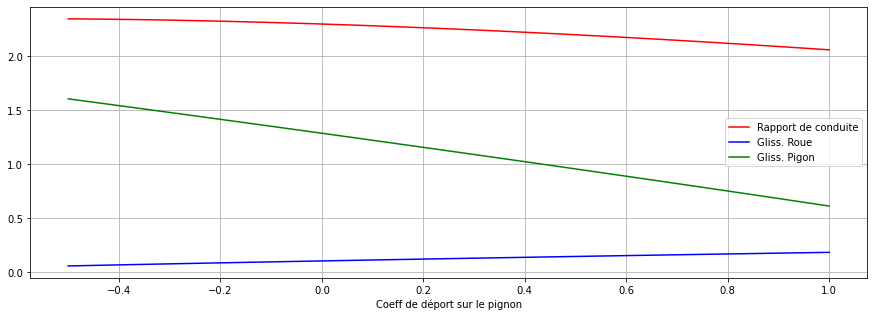

In [262]:
import matplotlib.pyplot as plt # On importe une librairie graphique.

m0 = 1.00
Z1 = 19
Z2 = Z1*6
m  = m0*np.cos(alpha0*np.pi/180)/np.cos(alpha*np.pi/180)
a  = m*(Z1+Z2)/2
r1 = m*Z1/2
r2 = m*Z2/2

calpha=np.cos(alpha*np.pi/180)
salpha=np.sin(alpha*np.pi/180)

# On génére une vecteur de 100 valeurs entres -0.5 et 1.00 pour le déport sur le pignon
x1 = np.linspace(-0.5,1.00,100)

rb1 = r1*calpha
rb2 = r2*calpha
x2 = somdep - x1      
ha1 = m*(1+x1)
ha2 = m*(1+x2)

# Pas de base :
pb = np.pi*m*calpha
# Longueur d'approche et de retrait :
IH1 = r1*salpha
IH2 = r2*salpha
AI = np.sqrt((r1+ha1)**2 -rb1**2)-IH1
IB = np.sqrt((r2+ha2)**2 -rb2**2)-IH2
C = (AI+IB)/pb

Gs2 = AI/IH2
Gs1 = IB/IH1
# Tracé :
plt.figure(figsize=(15,5))
plt.plot(x1,C,'r-',label='Rapport de conduite')
plt.plot(x1,Gs2,'b-',label='Gliss. Roue')
plt.plot(x1,Gs1,'g-',label='Gliss. Pigon')
plt.xlabel('Coeff de déport sur le pignon')
plt.grid()
plt.legend(loc='center right')

### Difficile d'équilibrer les usures !!!